In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

# Operações com o dado licitação

#### O separador do arquigo é vírgula, porém o DS_OBJETO às vezes tinha vírgula na decrição, então dei um sed s/, / /g para substituir as vírgulas espaço por espaço

In [2]:
licitacoes=pd.read_csv('2018/licitacao_editada.csv', sep = ',', low_memory=False)

In [3]:
print(licitacoes.columns.values)

['CD_ORGAO' 'NM_ORGAO' 'NR_LICITACAO' 'ANO_LICITACAO' 'CD_TIPO_MODALIDADE'
 'NR_COMISSAO' 'ANO_COMISSAO' 'TP_COMISSAO' 'NR_PROCESSO' 'ANO_PROCESSO'
 'TP_OBJETO' 'CD_TIPO_FASE_ATUAL' 'TP_LICITACAO' 'TP_NIVEL_JULGAMENTO'
 'DT_AUTORIZACAO_ADESAO' 'TP_CARACTERISTICA_OBJETO' 'TP_NATUREZA'
 'TP_REGIME_EXECUCAO' 'BL_PERMITE_SUBCONTRATACAO' 'TP_BENEFICIO_MICRO_EPP'
 'TP_FORNECIMENTO' 'TP_ATUACAO_REGISTRO' 'NR_LICITACAO_ORIGINAL'
 'ANO_LICITACAO_ORIGINAL' 'NR_ATA_REGISTRO_PRECO' 'DT_ATA_REGISTRO_PRECO'
 'PC_TAXA_RISCO' 'TP_EXECUCAO' 'TP_DISPUTA' 'TP_PREQUALIFICACAO'
 'BL_INVERSAO_FASES' 'TP_RESULTADO_GLOBAL' 'CNPJ_ORGAO_GERENCIADOR'
 'NM_ORGAO_GERENCIADOR' 'DS_OBJETO' 'CD_TIPO_FUNDAMENTACAO' 'NR_ARTIGO'
 'DS_INCISO' 'DS_LEI' 'DT_INICIO_INSCR_CRED' 'DT_FIM_INSCR_CRED'
 'DT_INICIO_VIGEN_CRED' 'DT_FIM_VIGEN_CRED' 'VL_LICITACAO'
 'BL_ORCAMENTO_SIGILOSO' 'BL_RECEBE_INSCRICAO_PER_VIG'
 'BL_PERMITE_CONSORCIO' 'DT_ABERTURA' 'DT_HOMOLOGACAO' 'DT_ADJUDICACAO'
 'BL_LICIT_PROPRIA_ORGAO' 'TP_DOCUMENTO_FORNE

In [4]:
licitacoes

,CD_ORGAO,NM_ORGAO,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,NR_COMISSAO,ANO_COMISSAO,TP_COMISSAO,NR_PROCESSO,ANO_PROCESSO,...,TP_DOCUMENTO_FORNECEDOR,NR_DOCUMENTO_FORNECEDOR,TP_DOCUMENTO_VENCEDOR,NR_DOCUMENTO_VENCEDOR,VL_HOMOLOGADO,BL_GERA_DESPESA,DS_OBSERVACAO,PC_TX_ESTIMADA,PC_TX_HOMOLOGADA,BL_COMPARTILHADA
0,45003,SERVIÇO AUTÔN. MUN. DE ÁGUA E ESGOTO - CX.SUL,82.0,2018,PRP,26258.0,2018.0,G,17685,2018,...,NaN,NaN,J,07024978000132,89000.00,S,NaN,NaN,NaN,N
1,45003,SERVIÇO AUTÔN. MUN. DE ÁGUA E ESGOTO - CX.SUL,54.0,2018,PRP,26258.0,2018.0,G,10315,2018,...,NaN,NaN,J,05229392000189,1560000.00,S,NaN,NaN,NaN,N
2,45003,SERVIÇO AUTÔN. MUN. DE ÁGUA E ESGOTO - CX.SUL,90.0,2018,PRP,26258.0,2018.0,G,18979,2018,...,NaN,NaN,J,87822110000117,210000.00,S,NaN,NaN,NaN,N
3,45003,SERVIÇO AUTÔN. MUN. DE ÁGUA E ESGOTO - CX.SUL,11.0,2018,PRP,25505.0,2017.0,G,2679,2018,...,NaN,NaN,J,87822110000117,120000.00,S,NaN,NaN,NaN,N
4,45003,SERVIÇO AUTÔN. MUN. DE ÁGUA E ESGOTO - CX.SUL,43.0,2018,PRP,25505.0,2017.0,G,8059,2018,...,NaN,NaN,J,87822110000117,236925.00,S,NaN,NaN,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73107,88370,CENTRAL DE LICITAÇÕES DO ESTADO,107.0,2018,PRE,1.0,2018.0,G,17310000037671,2017,...,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,N
73108,88370,CENTRAL DE LICITAÇÕES DO ESTADO,110.0,2018,PRE,1.0,2018.0,G,17120400172287,2017,...,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,N
73109,83700,PM DE CHUVISCA,2.0,2018,PRP,343.0,2017.0,P,002,2018,...,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,N
73110,7400,CENTRAIS DE ABASTECIMENTO DO RIO GRANDE DO SUL...,1.0,2018,TMP,14.0,2017.0,P,155,2017,...,NaN,NaN,NaN,NaN,34230.00,S,NaN,NaN,NaN,N


# Checando quantos valores faltantes existem

In [5]:
pd.set_option('display.max_rows', 1000)
print("Missing values: ", licitacoes.isnull().sum())

Missing values:  CD_ORGAO                           0
NM_ORGAO                           0
NR_LICITACAO                       0
ANO_LICITACAO                      0
CD_TIPO_MODALIDADE                 0
NR_COMISSAO                    26350
ANO_COMISSAO                   26350
TP_COMISSAO                    26342
NR_PROCESSO                       62
ANO_PROCESSO                      64
TP_OBJETO                          0
CD_TIPO_FASE_ATUAL                 0
TP_LICITACAO                       0
TP_NIVEL_JULGAMENTO               40
DT_AUTORIZACAO_ADESAO          72429
TP_CARACTERISTICA_OBJETO           0
TP_NATUREZA                       33
TP_REGIME_EXECUCAO             57457
BL_PERMITE_SUBCONTRATACAO      23282
TP_BENEFICIO_MICRO_EPP            22
TP_FORNECIMENTO                37031
TP_ATUACAO_REGISTRO            65289
NR_LICITACAO_ORIGINAL          72386
ANO_LICITACAO_ORIGINAL         60495
NR_ATA_REGISTRO_PRECO          72392
DT_ATA_REGISTRO_PRECO          72396
PC_TAXA_RISCO        

# Escolhendo as principais colunas e com poucos valores faltantes para formação do dataframe

In [6]:
df = licitacoes.loc[:,['CD_ORGAO', 'NM_ORGAO', 'NR_LICITACAO', 'ANO_LICITACAO', 'CD_TIPO_MODALIDADE', 'NR_PROCESSO', 'ANO_PROCESSO', 'TP_OBJETO', 'CD_TIPO_FASE_ATUAL', 'TP_LICITACAO', 'DS_OBJETO', 'VL_LICITACAO']]

In [7]:
df

,CD_ORGAO,NM_ORGAO,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,NR_PROCESSO,ANO_PROCESSO,TP_OBJETO,CD_TIPO_FASE_ATUAL,TP_LICITACAO,DS_OBJETO,VL_LICITACAO
0,45003,SERVIÇO AUTÔN. MUN. DE ÁGUA E ESGOTO - CX.SUL,82.0,2018,PRP,17685,2018,OUS,ADH,MPR,Contratação de empresa para fornecimento de ma...,165244.46
1,45003,SERVIÇO AUTÔN. MUN. DE ÁGUA E ESGOTO - CX.SUL,54.0,2018,PRP,10315,2018,CSE,ADH,MPR,Contratação de empresa para prestação de servi...,1596707.52
2,45003,SERVIÇO AUTÔN. MUN. DE ÁGUA E ESGOTO - CX.SUL,90.0,2018,PRP,18979,2018,COM,ADH,MPR,Aquisição de 60.000 kg (sessenta mil quilogram...,828000.00
3,45003,SERVIÇO AUTÔN. MUN. DE ÁGUA E ESGOTO - CX.SUL,11.0,2018,PRP,2679,2018,COM,ADH,MPR,Aquisição de 40.000 kg (quarenta mil quilogram...,231332.00
4,45003,SERVIÇO AUTÔN. MUN. DE ÁGUA E ESGOTO - CX.SUL,43.0,2018,PRP,8059,2018,COM,ADH,MPR,Aquisição de 40.500kg (quarenta mil e quinhent...,398115.00
...,...,...,...,...,...,...,...,...,...,...,...,...
73107,88370,CENTRAL DE LICITAÇÕES DO ESTADO,107.0,2018,PRE,17310000037671,2017,OUS,ADH,MPR,Serviço de conserto de caminhonete marca Mitsu...,34682.57
73108,88370,CENTRAL DE LICITAÇÕES DO ESTADO,110.0,2018,PRE,17120400172287,2017,OUS,ADH,MPR,Serviços de seguro aeronáutico e transportador...,210000.00
73109,83700,PM DE CHUVISCA,2.0,2018,PRP,002,2018,COM,ADH,MPR,REGISTRO DE PREÇOS PARA AQUISIÇÃO DE GÊNEROS A...,78770.49
73110,7400,CENTRAIS DE ABASTECIMENTO DO RIO GRANDE DO SUL...,1.0,2018,TMP,155,2017,CSE,ADH,MPR,Contratação de empresa fornecedora de Software...,42330.00


### Alguns valores no campo valor licitação estava com valores S e N que seriam de outra coluna, então tirei as linhas que estavam com esses valores errôneos

In [8]:
new_df = df[df.VL_LICITACAO != ('S' or 'N')]

In [9]:
new_df

,CD_ORGAO,NM_ORGAO,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,NR_PROCESSO,ANO_PROCESSO,TP_OBJETO,CD_TIPO_FASE_ATUAL,TP_LICITACAO,DS_OBJETO,VL_LICITACAO
0,45003,SERVIÇO AUTÔN. MUN. DE ÁGUA E ESGOTO - CX.SUL,82.0,2018,PRP,17685,2018,OUS,ADH,MPR,Contratação de empresa para fornecimento de ma...,165244.46
1,45003,SERVIÇO AUTÔN. MUN. DE ÁGUA E ESGOTO - CX.SUL,54.0,2018,PRP,10315,2018,CSE,ADH,MPR,Contratação de empresa para prestação de servi...,1596707.52
2,45003,SERVIÇO AUTÔN. MUN. DE ÁGUA E ESGOTO - CX.SUL,90.0,2018,PRP,18979,2018,COM,ADH,MPR,Aquisição de 60.000 kg (sessenta mil quilogram...,828000.00
3,45003,SERVIÇO AUTÔN. MUN. DE ÁGUA E ESGOTO - CX.SUL,11.0,2018,PRP,2679,2018,COM,ADH,MPR,Aquisição de 40.000 kg (quarenta mil quilogram...,231332.00
4,45003,SERVIÇO AUTÔN. MUN. DE ÁGUA E ESGOTO - CX.SUL,43.0,2018,PRP,8059,2018,COM,ADH,MPR,Aquisição de 40.500kg (quarenta mil e quinhent...,398115.00
...,...,...,...,...,...,...,...,...,...,...,...,...
73107,88370,CENTRAL DE LICITAÇÕES DO ESTADO,107.0,2018,PRE,17310000037671,2017,OUS,ADH,MPR,Serviço de conserto de caminhonete marca Mitsu...,34682.57
73108,88370,CENTRAL DE LICITAÇÕES DO ESTADO,110.0,2018,PRE,17120400172287,2017,OUS,ADH,MPR,Serviços de seguro aeronáutico e transportador...,210000.00
73109,83700,PM DE CHUVISCA,2.0,2018,PRP,002,2018,COM,ADH,MPR,REGISTRO DE PREÇOS PARA AQUISIÇÃO DE GÊNEROS A...,78770.49
73110,7400,CENTRAIS DE ABASTECIMENTO DO RIO GRANDE DO SUL...,1.0,2018,TMP,155,2017,CSE,ADH,MPR,Contratação de empresa fornecedora de Software...,42330.00


# Checando os valores faltantes do novo dataframe

In [10]:
print("Missing values: ", new_df.isnull().sum())

Missing values:  CD_ORGAO                 0
NM_ORGAO                 0
NR_LICITACAO             0
ANO_LICITACAO            0
CD_TIPO_MODALIDADE       0
NR_PROCESSO             62
ANO_PROCESSO            64
TP_OBJETO                0
CD_TIPO_FASE_ATUAL       0
TP_LICITACAO             0
DS_OBJETO              111
VL_LICITACAO          3143
dtype: int64


# Como todos os processos são de 2018, posso preencher todas as linhas do ano do processo pelo ano 2018, e assim não haverá dados faltantes nessa coluna

In [11]:
new_df.loc[:,'ANO_PROCESSO'] = 2018

/home/thais/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


# Removendo as linhas que contém dados faltantes

In [12]:
licitacoes_nova = new_df.dropna(subset=['NR_PROCESSO', 'DS_OBJETO', 'VL_LICITACAO'])

In [13]:
print("Missing values: ", licitacoes_nova.isnull().sum())

Missing values:  CD_ORGAO              0
NM_ORGAO              0
NR_LICITACAO          0
ANO_LICITACAO         0
CD_TIPO_MODALIDADE    0
NR_PROCESSO           0
ANO_PROCESSO          0
TP_OBJETO             0
CD_TIPO_FASE_ATUAL    0
TP_LICITACAO          0
DS_OBJETO             0
VL_LICITACAO          0
dtype: int64


In [14]:
for column in licitacoes_nova.columns:
     print("\n" + column)
     print(licitacoes_nova[column].value_counts())


CD_ORGAO
49300    820
63400    812
53400    782
88370    718
88004    660
        ... 
41101      1
77501      1
64601      1
88061      1
73601      1
Name: CD_ORGAO, Length: 1039, dtype: int64

NM_ORGAO
PM DE GUAPORÉ                                        820
PM DE CAPÃO DA CANOA                                 812
PM DE NOVO HAMBURGO                                  782
CENTRAL DE LICITAÇÕES DO ESTADO                      718
SECRETARIA DA SAÚDE DO RS                            660
                                                    ... 
CM DE CERRO GRANDE DO SUL                              1
FUND. DE ATENDIMENTO SÓCIO-EDUCATIVO DO RGS            1
CM DE VALE REAL                                        1
CM DE CANUDOS DO VALE                                  1
INST. MUN. PREV. ASSIST. SERV. - SALDANHA MARINHO      1
Name: NM_ORGAO, Length: 1039, dtype: int64

NR_LICITACAO
1.000000e+00    3922
2.000000e+00    3038
3.000000e+00    2494
4.000000e+00    2194
5.000000e+00    1966
     

# Selecionando as licitações cujo TP_OBJETO seja compra, como foi sugerido no pdf da descrição do teste técnico

In [15]:
licitacoes_compra = licitacoes_nova[licitacoes_nova['TP_OBJETO'] == 'COM']

# Checando se há linhas duplicadas

In [16]:
print("Duplicated values: ", df.duplicated().sum())

Duplicated values:  0


# Convertendo a coluna de VL_LICITAÇÃO em float

In [17]:
licitacoes_compra['VL_LICITACAO'] = pd.to_numeric(licitacoes_compra['VL_LICITACAO'],errors='coerce')
licitacoes_compra.dtypes

/home/thais/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


CD_ORGAO                int64
NM_ORGAO               object
NR_LICITACAO          float64
ANO_LICITACAO           int64
CD_TIPO_MODALIDADE     object
NR_PROCESSO            object
ANO_PROCESSO            int64
TP_OBJETO              object
CD_TIPO_FASE_ATUAL     object
TP_LICITACAO           object
DS_OBJETO              object
VL_LICITACAO          float64
dtype: object

# Checando a estatística dos valores de licitação

In [18]:
licitacoes_compra['VL_LICITACAO'].describe()

count    2.275500e+04
mean     1.036948e+06
std      1.042567e+08
min      0.000000e+00
25%      4.788350e+03
50%      2.499000e+04
75%      1.125605e+05
max      1.569896e+10
Name: VL_LICITACAO, dtype: float64

# Observando quais palavras são mais relevantes na descrição do objeto (DS_OBJETO) das compras para tentar saber quais foram os objetos que tiveram mais gastos públicos

In [19]:
def nuvem_palavras(coluna_dataframe):
    
    palavras = ''
    stopwords= set(STOPWORDS)

    # Lista de palavras que não serão contabilizadas
    novas_palavras = ["de", "da", "do", "para", "dos", "das", 
                     "em", "aquisição", "por", "preço", "registro", 
                     "preços", "um", "através", "na", "no", "ou", 
                      "preco", "compra", "aquisição", "aquisicao", "uso", 
                      "realizada", "despesa", "2019", "nº", "rs", "bonito",
                      "processo", "objeto"]

    with open("stop_words_pt.txt", 'r') as f:
        [novas_palavras.append(palavras) for linha in f for palavras in linha.split()]

    nova_stopwords = stopwords.union(novas_palavras)

    for val in coluna_dataframe: 

        # converter cada linha para string 
        val = str(val) 

        # splitar cada linha em uma lista de palavras (tokens)
        tokens = val.split() 

        # Converter cada token em letra minuscula
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower() 

        palavras += " ".join(tokens)+" "

    # Formando a nunvem de palavras    
    wordcloud = WordCloud(width = 500, height = 500, 
                    background_color ='white', 
                    stopwords = nova_stopwords, 
                    min_font_size = 10).generate(palavras) 

    # Plotando a imagem de nuvem de palavras                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 

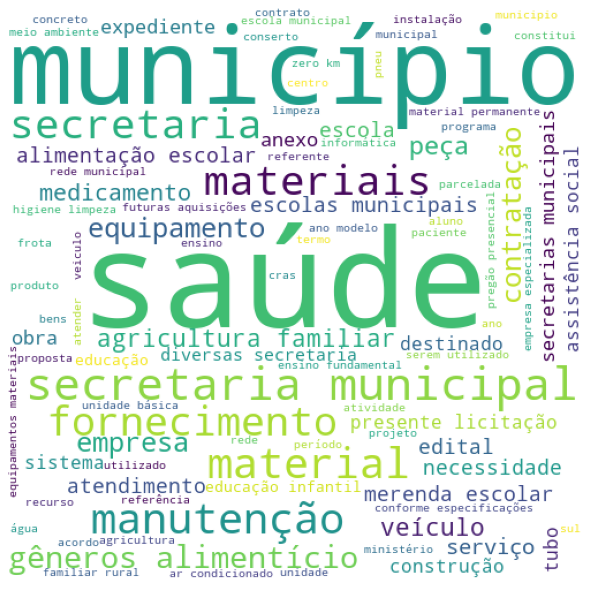

In [20]:
nuvem_palavras(licitacoes_compra.DS_OBJETO)

# Trabalhando com os dados licitante e proposta

In [21]:
licitantes=pd.read_csv('2018/licitante.csv', sep = ',', low_memory=False)
propostas=pd.read_csv('2018/proposta.csv', sep = ',', low_memory=False)

In [22]:
licitantes

,CD_ORGAO,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,TP_DOCUMENTO,NR_DOCUMENTO,TP_DOCUMENTO.1,NR_DOCUMENTO.1,TP_CONDICAO,TP_RESULTADO_HABILITACAO,BL_BENEFICIO_MICRO_EPP
0,65300,1.0,2018,PRP,J,20519809000131,F,01344779018,NaN,NaN,N
1,65300,1.0,2018,PRP,J,94510682000126,F,00430756909,NaN,NaN,N
2,65300,1.0,2018,PRP,J,73730129000803,F,83717773020,NaN,NaN,N
3,65300,1.0,2018,PRP,J,93191146000142,F,00152806083,NaN,NaN,N
4,7400,1.0,2018,TMP,J,92971654000180,NaN,NaN,NaN,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
116049,63500,1.0,2018,CHP,F,56670451091,NaN,NaN,NaN,NaN,N
116050,63500,1.0,2018,CHP,F,01662393059,NaN,NaN,NaN,NaN,N
116051,63500,1.0,2018,CHP,F,01652863001,NaN,NaN,NaN,NaN,N
116052,41603,14.0,2018,PRE,J,73628307000105,NaN,NaN,NaN,NaN,S


In [23]:
propostas

,CD_ORGAO,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,TP_DOCUMENTO,NR_DOCUMENTO,DT_PROPOSTA,TP_RESULTADO_PROPOSTA,VL_TOTAL_PROPOSTA,PC_DESCONTO,VL_NOTA_TECNICA,DT_HOMOLOGACAO,PC_TX
0,65300,1.0,2018,PRP,J,20519809000131,2018-01-16,NaN,114838.0,NaN,NaN,NaN,NaN
1,65300,1.0,2018,PRP,J,94510682000126,2018-01-11,NaN,101066.0,NaN,NaN,NaN,NaN
2,65300,1.0,2018,PRP,J,73730129000803,2018-01-17,NaN,106380.0,NaN,NaN,NaN,NaN
3,65300,1.0,2018,PRP,J,93191146000142,2018-01-17,NaN,109332.0,NaN,NaN,NaN,NaN
4,7400,1.0,2018,TMP,J,92971654000180,2018-01-19,NaN,40098.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116049,63500,1.0,2018,CHP,F,56670451091,2018-03-14,NaN,14066.0,0.0,NaN,NaN,NaN
116050,63500,1.0,2018,CHP,F,01662393059,2018-03-14,NaN,10440.0,0.0,NaN,NaN,NaN
116051,63500,1.0,2018,CHP,F,01652863001,2018-03-14,NaN,12480.0,0.0,NaN,NaN,NaN
116052,41603,14.0,2018,PRE,J,73628307000105,2018-06-12,NaN,2330.0,NaN,NaN,NaN,NaN


# Esses dados tem relacionamento 1:1 e as colunas abaixo, são iguais em ambos os dados, então eu posso juntar esses 2 dados em um só

In [24]:
licitante_propostas = pd.merge(licitantes, propostas, on=['CD_ORGAO', 'NR_LICITACAO', 'ANO_LICITACAO', 'CD_TIPO_MODALIDADE', 'TP_DOCUMENTO', 'NR_DOCUMENTO'])

In [25]:
licitante_propostas

,CD_ORGAO,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,TP_DOCUMENTO,NR_DOCUMENTO,TP_DOCUMENTO.1,NR_DOCUMENTO.1,TP_CONDICAO,TP_RESULTADO_HABILITACAO,BL_BENEFICIO_MICRO_EPP,DT_PROPOSTA,TP_RESULTADO_PROPOSTA,VL_TOTAL_PROPOSTA,PC_DESCONTO,VL_NOTA_TECNICA,DT_HOMOLOGACAO,PC_TX
0,65300,1.0,2018,PRP,J,20519809000131,F,01344779018,NaN,NaN,N,2018-01-16,NaN,114838.0,NaN,NaN,NaN,NaN
1,65300,1.0,2018,PRP,J,94510682000126,F,00430756909,NaN,NaN,N,2018-01-11,NaN,101066.0,NaN,NaN,NaN,NaN
2,65300,1.0,2018,PRP,J,73730129000803,F,83717773020,NaN,NaN,N,2018-01-17,NaN,106380.0,NaN,NaN,NaN,NaN
3,65300,1.0,2018,PRP,J,93191146000142,F,00152806083,NaN,NaN,N,2018-01-17,NaN,109332.0,NaN,NaN,NaN,NaN
4,7400,1.0,2018,TMP,J,92971654000180,NaN,NaN,NaN,NaN,S,2018-01-19,NaN,40098.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116049,63500,1.0,2018,CHP,F,56670451091,NaN,NaN,NaN,NaN,N,2018-03-14,NaN,14066.0,0.0,NaN,NaN,NaN
116050,63500,1.0,2018,CHP,F,01662393059,NaN,NaN,NaN,NaN,N,2018-03-14,NaN,10440.0,0.0,NaN,NaN,NaN
116051,63500,1.0,2018,CHP,F,01652863001,NaN,NaN,NaN,NaN,N,2018-03-14,NaN,12480.0,0.0,NaN,NaN,NaN
116052,41603,14.0,2018,PRE,J,73628307000105,NaN,NaN,NaN,NaN,S,2018-06-12,NaN,2330.0,NaN,NaN,NaN,NaN


# Checando valores faltantes

In [26]:
print("Missing values: ", licitante_propostas.isnull().sum())

Missing values:  CD_ORGAO                         0
NR_LICITACAO                     0
ANO_LICITACAO                    0
CD_TIPO_MODALIDADE               0
TP_DOCUMENTO                     0
NR_DOCUMENTO                     0
TP_DOCUMENTO.1               53239
NR_DOCUMENTO.1               53239
TP_CONDICAO                  98303
TP_RESULTADO_HABILITACAO    101885
BL_BENEFICIO_MICRO_EPP        4707
DT_PROPOSTA                      0
TP_RESULTADO_PROPOSTA        92688
VL_TOTAL_PROPOSTA            11829
PC_DESCONTO                  78189
VL_NOTA_TECNICA              88231
DT_HOMOLOGACAO               96364
PC_TX                       115895
dtype: int64


# Checando valores duplicados

In [27]:
print("Duplicated values: ", licitante_propostas.duplicated().sum())

Duplicated values:  0


# Observando as estatísticas das colunas que são valores numéricos

In [28]:
licitante_propostas.describe()

,CD_ORGAO,NR_LICITACAO,ANO_LICITACAO,VL_TOTAL_PROPOSTA,PC_DESCONTO,VL_NOTA_TECNICA,PC_TX
count,116054.000000,1.160540e+05,116054.0,1.042250e+05,37865.000000,27823.000000,159.000000
mean,59318.154083,8.199815e+02,2018.0,1.196875e+06,0.080294,0.776992,2.243950
std,19213.855563,4.103920e+04,0.0,1.808024e+08,1.489831,60.849433,8.868619
min,100.000000,1.000000e+00,2018.0,0.000000e+00,0.000000,0.000000,-3.520000
25%,48600.000000,6.000000e+00,2018.0,7.270680e+03,0.000000,0.000000,0.000000
50%,58100.000000,2.000000e+01,2018.0,2.800000e+04,0.000000,0.000000,0.000000
75%,72900.000000,6.000000e+01,2018.0,1.055510e+05,0.000000,0.000000,1.118250
max,88397.000000,9.090001e+06,2018.0,5.711402e+10,100.000000,9860.000000,100.000000


# Remover as linhas que têm dados faltantes em VL_TOTAL_PROPOSTA

In [29]:
licitante_propostas_nova = licitante_propostas.dropna(subset=['VL_TOTAL_PROPOSTA'])

# Checando os valores faltantes no novo dataframe

In [30]:
print("Missing values: ", licitante_propostas_nova.isnull().sum())

Missing values:  CD_ORGAO                         0
NR_LICITACAO                     0
ANO_LICITACAO                    0
CD_TIPO_MODALIDADE               0
TP_DOCUMENTO                     0
NR_DOCUMENTO                     0
TP_DOCUMENTO.1               45417
NR_DOCUMENTO.1               45417
TP_CONDICAO                  90191
TP_RESULTADO_HABILITACAO     92607
BL_BENEFICIO_MICRO_EPP        4335
DT_PROPOSTA                      0
TP_RESULTADO_PROPOSTA        81064
VL_TOTAL_PROPOSTA                0
PC_DESCONTO                  66456
VL_NOTA_TECNICA              76501
DT_HOMOLOGACAO               84599
PC_TX                       104094
dtype: int64


# Criando um novo dataframe com as colunas mais importantes e com poucos dados faltantes

In [31]:
licitacoes_vencedoras = licitante_propostas_nova.loc[:,['CD_ORGAO','NR_LICITACAO', 'ANO_LICITACAO', 'CD_TIPO_MODALIDADE', 'NR_DOCUMENTO', 'DT_PROPOSTA', 'VL_TOTAL_PROPOSTA', 'TP_RESULTADO_PROPOSTA']]

# Criando um dataframe apenas com as licitação que têm o resultado da posposta (vencedora, perdedora ou pendente)

In [32]:
licitacoes_vencedoras = licitacoes_vencedoras.dropna(subset=['TP_RESULTADO_PROPOSTA'])

# Escolhendo apenas as licitações classificadas como vencedoras

In [33]:
licitacoes_vencedoras = licitacoes_vencedoras[licitacoes_vencedoras['TP_RESULTADO_PROPOSTA'] == 'C']

In [34]:
licitacoes_vencedoras

,CD_ORGAO,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,NR_DOCUMENTO,DT_PROPOSTA,VL_TOTAL_PROPOSTA,TP_RESULTADO_PROPOSTA
39,65000,2.0,2018,CNV,09280323000150,2018-01-23,54126.0,C
73,48400,15.0,2018,PRP,14480526000120,2018-02-16,14433.1,C
74,48400,15.0,2018,PRP,14797430000190,2018-02-16,64560.1,C
75,48400,15.0,2018,PRP,05118043000190,2018-02-16,285456.3,C
76,48400,15.0,2018,PRP,02459406000162,2018-02-16,51793.6,C
...,...,...,...,...,...,...,...,...
116040,51200,88.0,2018,CHP,75381869053,2018-09-17,7544.0,C
116041,51200,18.0,2018,CHP,14506106000176,2018-04-09,153454.0,C
116042,51200,18.0,2018,CHP,89520947000,2018-04-09,153454.0,C
116043,51200,18.0,2018,CHP,02947917014,2018-04-09,153454.0,C


# Juntando as licitações com licitantes e propostas

In [35]:
licitacoes_licitante_proposta = pd.merge(licitacoes_compra, licitacoes_vencedoras, on=['CD_ORGAO', 'NR_LICITACAO', 'ANO_LICITACAO', 'CD_TIPO_MODALIDADE'])

In [36]:
licitacoes_licitante_proposta

,CD_ORGAO,NM_ORGAO,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,NR_PROCESSO,ANO_PROCESSO,TP_OBJETO,CD_TIPO_FASE_ATUAL,TP_LICITACAO,DS_OBJETO,VL_LICITACAO,NR_DOCUMENTO,DT_PROPOSTA,VL_TOTAL_PROPOSTA,TP_RESULTADO_PROPOSTA
0,45003,SERVIÇO AUTÔN. MUN. DE ÁGUA E ESGOTO - CX.SUL,90.0,2018,PRP,18979,2018,COM,ADH,MPR,Aquisição de 60.000 kg (sessenta mil quilogram...,828000.00,87822110000117,2018-11-23,210000.00,C
1,45003,SERVIÇO AUTÔN. MUN. DE ÁGUA E ESGOTO - CX.SUL,11.0,2018,PRP,2679,2018,COM,ADH,MPR,Aquisição de 40.000 kg (quarenta mil quilogram...,231332.00,87822110000117,2018-03-05,120000.00,C
2,45003,SERVIÇO AUTÔN. MUN. DE ÁGUA E ESGOTO - CX.SUL,43.0,2018,PRP,8059,2018,COM,ADH,MPR,Aquisição de 40.500kg (quarenta mil e quinhent...,398115.00,87822110000117,2018-06-06,236925.00,C
3,45003,SERVIÇO AUTÔN. MUN. DE ÁGUA E ESGOTO - CX.SUL,10.0,2018,PRP,1639,2018,COM,ADH,MPR,Aquisição de 65 t (sessenta e cindo toneladas)...,482082.90,87822110000117,2018-02-19,328900.00,C
4,45003,SERVIÇO AUTÔN. MUN. DE ÁGUA E ESGOTO - CX.SUL,66.0,2018,PRP,12104,2018,COM,ADH,MPR,Aquisição de baterias estacionárias para subst...,71124.13,02324209000136,2018-08-14,68500.00,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3807,48400,PM DE FREDERICO WESTPHALEN,15.0,2018,PRP,29,2018,COM,ADH,MPR,aquisição de materiais pedagógicos destinados ...,969611.60,05118043000190,2018-02-16,285456.30,C
3808,48400,PM DE FREDERICO WESTPHALEN,15.0,2018,PRP,29,2018,COM,ADH,MPR,aquisição de materiais pedagógicos destinados ...,969611.60,02459406000162,2018-02-16,51793.60,C
3809,48400,PM DE FREDERICO WESTPHALEN,15.0,2018,PRP,29,2018,COM,ADH,MPR,aquisição de materiais pedagógicos destinados ...,969611.60,10925677000194,2018-02-16,48732.80,C
3810,48400,PM DE FREDERICO WESTPHALEN,15.0,2018,PRP,29,2018,COM,ADH,MPR,aquisição de materiais pedagógicos destinados ...,969611.60,28629492000106,2018-02-16,48509.86,C


In [37]:
print("Missing values: ", licitacoes_licitante_proposta.isnull().sum())

Missing values:  CD_ORGAO                 0
NM_ORGAO                 0
NR_LICITACAO             0
ANO_LICITACAO            0
CD_TIPO_MODALIDADE       0
NR_PROCESSO              0
ANO_PROCESSO             0
TP_OBJETO                0
CD_TIPO_FASE_ATUAL       0
TP_LICITACAO             0
DS_OBJETO                0
VL_LICITACAO             0
NR_DOCUMENTO             0
DT_PROPOSTA              0
VL_TOTAL_PROPOSTA        0
TP_RESULTADO_PROPOSTA    0
dtype: int64


# Somando todos os valores de propostas das licitações vencedoras de acordo com os nome dos orgãos, a fim de saber qual orgão pediu e recebeu mais dinheiro nas propostas do ano

In [38]:
licitacoes_vencedoras_soma = pd.DataFrame(licitacoes_licitante_proposta.groupby(['NM_ORGAO']).sum()['VL_TOTAL_PROPOSTA']).sort_values(by=['VL_TOTAL_PROPOSTA'], ascending=False)

In [39]:
licitacoes_vencedoras_soma

,VL_TOTAL_PROPOSTA
NM_ORGAO,
PM DE PORTO ALEGRE,3.190039e+08
PM DE RIO GRANDE,2.536624e+08
PM DE FREDERICO WESTPHALEN,1.545534e+07
PM DE ALPESTRE,1.253081e+07
BANCO DO ESTADO DO RIO GRANDE DO SUL S.A.,1.048068e+07
CONS. PÚBL. DO EXTREMO SUL,1.042571e+07
CIA. CARRIS PORTO-ALEGRENSE,9.590308e+06
PM DE SÃO VICENTE DO SUL,9.204611e+06
PM DE ESTEIO,8.856570e+06


In [40]:
pd.DataFrame(licitacoes_licitante_proposta.groupby(['NM_ORGAO']).sum()['VL_LICITACAO']).sort_values(by=['VL_LICITACAO'], ascending=False)

,VL_LICITACAO
NM_ORGAO,
PM DE PORTO ALEGRE,3.067565e+08
PM DE FREDERICO WESTPHALEN,6.735973e+07
PM DE SÃO VICENTE DO SUL,5.145942e+07
PM DE ALPESTRE,4.807587e+07
PM DE MAÇAMBARÁ,3.120133e+07
PM DE ESPUMOSO,3.097360e+07
PM DE IBIRUBÁ,2.341115e+07
PM DE SEBERI,1.891949e+07
PM DE RODEIO BONITO,1.724351e+07


# Fazendo a nuvem de palavras para saber quais as descrições de objetos que mais ganharam dinheiro de licitações

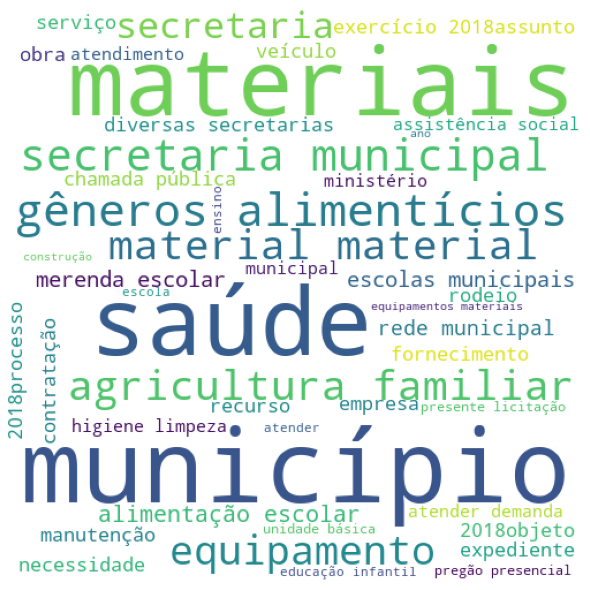

In [41]:
nuvem_palavras(licitacoes_licitante_proposta.DS_OBJETO)

# Carregando o arquivo de itens

In [42]:
itens=pd.read_csv('2018/item.csv', sep = ',', low_memory=False)

# Checando as colunas de itens para saber quais estão em comum com o dataframe de licitações, licitantes e propostas

In [43]:
print(itens.columns.values)

['CD_ORGAO' 'NR_LICITACAO' 'ANO_LICITACAO' 'CD_TIPO_MODALIDADE' 'NR_LOTE'
 'NR_ITEM' 'NR_ITEM_ORIGINAL' 'DS_ITEM' 'QT_ITENS' 'SG_UNIDADE_MEDIDA'
 'VL_UNITARIO_ESTIMADO' 'VL_TOTAL_ESTIMADO' 'DT_REF_VALOR_ESTIMADO'
 'PC_BDI_ESTIMADO' 'PC_ENCARGOS_SOCIAIS_ESTIMADO' 'CD_FONTE_REFERENCIA'
 'DS_FONTE_REFERENCIA' 'TP_RESULTADO_ITEM' 'VL_UNITARIO_HOMOLOGADO'
 'VL_TOTAL_HOMOLOGADO' 'PC_BDI_HOMOLOGADO'
 'PC_ENCARGOS_SOCIAIS_HOMOLOGADO' 'TP_ORCAMENTO' 'CD_TIPO_FAMILIA'
 'CD_TIPO_SUBFAMILIA' 'TP_DOCUMENTO' 'NR_DOCUMENTO' 'TP_DOCUMENTO.1'
 'NR_DOCUMENTO.1' 'TP_BENEFICIO_MICRO_EPP' 'PC_TX_ESTIMADA'
 'PC_TX_HOMOLOGADA']


# Juntando os dataframes de acordo com as colunas que estão em comum entre os dataframes

In [44]:
itens_licitacoes_licitante_proposta = pd.merge(licitacoes_licitante_proposta, itens, on=['CD_ORGAO', 'NR_LICITACAO', 'ANO_LICITACAO', 'CD_TIPO_MODALIDADE', 'NR_DOCUMENTO'])

In [45]:
itens_licitacoes_licitante_proposta

,CD_ORGAO,NM_ORGAO,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,NR_PROCESSO,ANO_PROCESSO,TP_OBJETO,CD_TIPO_FASE_ATUAL,TP_LICITACAO,...,PC_ENCARGOS_SOCIAIS_HOMOLOGADO,TP_ORCAMENTO,CD_TIPO_FAMILIA,CD_TIPO_SUBFAMILIA,TP_DOCUMENTO,TP_DOCUMENTO.1,NR_DOCUMENTO.1,TP_BENEFICIO_MICRO_EPP,PC_TX_ESTIMADA,PC_TX_HOMOLOGADA
0,45003,SERVIÇO AUTÔN. MUN. DE ÁGUA E ESGOTO - CX.SUL,90.0,2018,PRP,18979,2018,COM,ADH,MPR,...,NaN,NaN,NaN,NaN,J,NaN,NaN,NaN,NaN,NaN
1,45003,SERVIÇO AUTÔN. MUN. DE ÁGUA E ESGOTO - CX.SUL,11.0,2018,PRP,2679,2018,COM,ADH,MPR,...,NaN,NaN,NaN,NaN,J,NaN,NaN,NaN,NaN,NaN
2,45003,SERVIÇO AUTÔN. MUN. DE ÁGUA E ESGOTO - CX.SUL,43.0,2018,PRP,8059,2018,COM,ADH,MPR,...,NaN,NaN,NaN,NaN,J,NaN,NaN,NaN,NaN,NaN
3,45003,SERVIÇO AUTÔN. MUN. DE ÁGUA E ESGOTO - CX.SUL,10.0,2018,PRP,1639,2018,COM,ADH,MPR,...,NaN,NaN,NaN,NaN,J,NaN,NaN,NaN,NaN,NaN
4,45003,SERVIÇO AUTÔN. MUN. DE ÁGUA E ESGOTO - CX.SUL,66.0,2018,PRP,12104,2018,COM,ADH,MPR,...,NaN,NaN,NaN,NaN,J,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25186,48400,PM DE FREDERICO WESTPHALEN,15.0,2018,PRP,29,2018,COM,ADH,MPR,...,0.0,NaN,NaN,NaN,J,NaN,NaN,L,NaN,NaN
25187,48400,PM DE FREDERICO WESTPHALEN,15.0,2018,PRP,29,2018,COM,ADH,MPR,...,0.0,NaN,NaN,NaN,J,NaN,NaN,L,NaN,NaN
25188,48400,PM DE FREDERICO WESTPHALEN,15.0,2018,PRP,29,2018,COM,ADH,MPR,...,0.0,NaN,NaN,NaN,J,NaN,NaN,L,NaN,NaN
25189,48400,PM DE FREDERICO WESTPHALEN,15.0,2018,PRP,29,2018,COM,ADH,MPR,...,0.0,NaN,NaN,NaN,J,NaN,NaN,L,NaN,NaN


# Checando os valores faltantes

In [46]:
print("Missing values: ", itens_licitacoes_licitante_proposta.isnull().sum())

Missing values:  CD_ORGAO                              0
NM_ORGAO                              0
NR_LICITACAO                          0
ANO_LICITACAO                         0
CD_TIPO_MODALIDADE                    0
NR_PROCESSO                           0
ANO_PROCESSO                          0
TP_OBJETO                             0
CD_TIPO_FASE_ATUAL                    0
TP_LICITACAO                          0
DS_OBJETO                             0
VL_LICITACAO                          0
NR_DOCUMENTO                          0
DT_PROPOSTA                           0
VL_TOTAL_PROPOSTA                     0
TP_RESULTADO_PROPOSTA                 0
NR_LOTE                               0
NR_ITEM                               0
NR_ITEM_ORIGINAL                      0
DS_ITEM                               0
QT_ITENS                              0
SG_UNIDADE_MEDIDA                     0
VL_UNITARIO_ESTIMADO                703
VL_TOTAL_ESTIMADO                   703
DT_REF_VALOR_ESTIMADO  

# Criando o novo dataframde com as colunas que não tem dados faltantes + as colunas de valores homologados

In [47]:
item = itens_licitacoes_licitante_proposta.loc[:,['CD_ORGAO', 'NM_ORGAO', 'NR_LICITACAO', 'ANO_LICITACAO', 'CD_TIPO_MODALIDADE', 'NR_PROCESSO', 'ANO_PROCESSO', 'TP_OBJETO', 'CD_TIPO_FASE_ATUAL', 'TP_LICITACAO', 'DS_OBJETO', 'VL_LICITACAO', 'NR_DOCUMENTO', 'DT_PROPOSTA', 'VL_TOTAL_PROPOSTA', 'TP_RESULTADO_PROPOSTA', 'NR_LOTE', 'NR_ITEM', 'NR_ITEM_ORIGINAL', 'DS_ITEM', 'QT_ITENS', 'SG_UNIDADE_MEDIDA', 'VL_UNITARIO_HOMOLOGADO', 'VL_TOTAL_HOMOLOGADO', 'TP_DOCUMENTO']]

# Removendo as linhas que não possuem os valores homologados

In [48]:
item = item.dropna(subset=['VL_UNITARIO_HOMOLOGADO', 'VL_TOTAL_HOMOLOGADO'])

In [49]:
item

,CD_ORGAO,NM_ORGAO,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,NR_PROCESSO,ANO_PROCESSO,TP_OBJETO,CD_TIPO_FASE_ATUAL,TP_LICITACAO,...,TP_RESULTADO_PROPOSTA,NR_LOTE,NR_ITEM,NR_ITEM_ORIGINAL,DS_ITEM,QT_ITENS,SG_UNIDADE_MEDIDA,VL_UNITARIO_HOMOLOGADO,VL_TOTAL_HOMOLOGADO,TP_DOCUMENTO
0,45003,SERVIÇO AUTÔN. MUN. DE ÁGUA E ESGOTO - CX.SUL,90.0,2018,PRP,18979,2018,COM,ADH,MPR,...,C,1,1,1,Antiespumante para controle e minimização de e...,60000.00,KG,3.50,210000.00,J
1,45003,SERVIÇO AUTÔN. MUN. DE ÁGUA E ESGOTO - CX.SUL,11.0,2018,PRP,2679,2018,COM,ADH,MPR,...,C,1,1,1,Aquisição de 40.000 kg (quarenta mil quilogram...,40000.00,KG,3.00,120000.00,J
2,45003,SERVIÇO AUTÔN. MUN. DE ÁGUA E ESGOTO - CX.SUL,43.0,2018,PRP,8059,2018,COM,ADH,MPR,...,C,1,1,1,"Ortopolifosfato líquido, concentração de 50 a ...",40500.00,KG,5.85,236925.00,J
3,45003,SERVIÇO AUTÔN. MUN. DE ÁGUA E ESGOTO - CX.SUL,10.0,2018,PRP,1639,2018,COM,ADH,MPR,...,C,1,1,1,Aquisição de 65 t (sessenta e cindo toneladas)...,65.00,T,5060.00,328900.00,J
4,45003,SERVIÇO AUTÔN. MUN. DE ÁGUA E ESGOTO - CX.SUL,66.0,2018,PRP,12104,2018,COM,ADH,MPR,...,C,1,3,3,"Bateria estacionária, para uso em nobreakes, 1...",48.00,UN,656.25,31500.00,J
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25186,48400,PM DE FREDERICO WESTPHALEN,15.0,2018,PRP,29,2018,COM,ADH,MPR,...,C,1,4,4,Balão de latex nº 07 fabricado de borracha nat...,900.00,PAC,3.70,3330.00,J
25187,48400,PM DE FREDERICO WESTPHALEN,15.0,2018,PRP,29,2018,COM,ADH,MPR,...,C,1,125,125,Tinta tempera guache c/06 cores em potes plast...,3330.00,CX,2.12,7059.60,J
25188,48400,PM DE FREDERICO WESTPHALEN,15.0,2018,PRP,29,2018,COM,ADH,MPR,...,C,1,117,117,Refil cola quente grosso super transparente co...,10500.00,UN,0.59,6195.00,J
25189,48400,PM DE FREDERICO WESTPHALEN,15.0,2018,PRP,29,2018,COM,ADH,MPR,...,C,1,1,1,Alfinete de costura fabricado com arame de aço...,79.00,CX,3.50,276.50,J


In [50]:
print("Missing values: ", item.isnull().sum())

Missing values:  CD_ORGAO                  0
NM_ORGAO                  0
NR_LICITACAO              0
ANO_LICITACAO             0
CD_TIPO_MODALIDADE        0
NR_PROCESSO               0
ANO_PROCESSO              0
TP_OBJETO                 0
CD_TIPO_FASE_ATUAL        0
TP_LICITACAO              0
DS_OBJETO                 0
VL_LICITACAO              0
NR_DOCUMENTO              0
DT_PROPOSTA               0
VL_TOTAL_PROPOSTA         0
TP_RESULTADO_PROPOSTA     0
NR_LOTE                   0
NR_ITEM                   0
NR_ITEM_ORIGINAL          0
DS_ITEM                   0
QT_ITENS                  0
SG_UNIDADE_MEDIDA         0
VL_UNITARIO_HOMOLOGADO    0
VL_TOTAL_HOMOLOGADO       0
TP_DOCUMENTO              0
dtype: int64


In [111]:
item.to_csv('2018/arquivo_2018.txt')

# Observando a estatistica das colunas numéricas do novo dataframe

In [51]:
item.describe()

,CD_ORGAO,NR_LICITACAO,ANO_LICITACAO,ANO_PROCESSO,VL_LICITACAO,VL_TOTAL_PROPOSTA,NR_LOTE,NR_ITEM,VL_UNITARIO_HOMOLOGADO
count,25122.000000,25122.000000,25122.0,25122.0,2.512200e+04,2.512200e+04,25122.000000,25122.000000,2.512200e+04
mean,58248.007762,518.694421,2018.0,2018.0,1.878347e+05,1.613275e+05,1.073879,13213.240387,2.978425e+03
std,14160.174766,8240.662321,0.0,0.0,6.962902e+05,8.715478e+05,1.656465,55673.744209,5.102113e+04
min,900.000000,1.000000,2018.0,2018.0,0.000000e+00,4.000000e-01,0.000000,1.000000,0.000000e+00
25%,48400.000000,6.000000,2018.0,2018.0,9.956190e+03,1.043326e+04,1.000000,10.000000,2.500000e+00
50%,55900.000000,15.000000,2018.0,2018.0,3.780814e+04,2.416190e+04,1.000000,31.000000,7.600000e+00
75%,67100.000000,37.000000,2018.0,2018.0,1.166074e+05,6.869681e+04,1.000000,72.000000,4.046250e+01
max,88329.000000,715002.000000,2018.0,2018.0,1.158380e+07,4.058873e+07,44.000000,290864.000000,4.470000e+06


# Testando se a nuvem de palavras apresenta palavras que fazem sentido no contexto, a fim de obter informações sobre os itens comprados

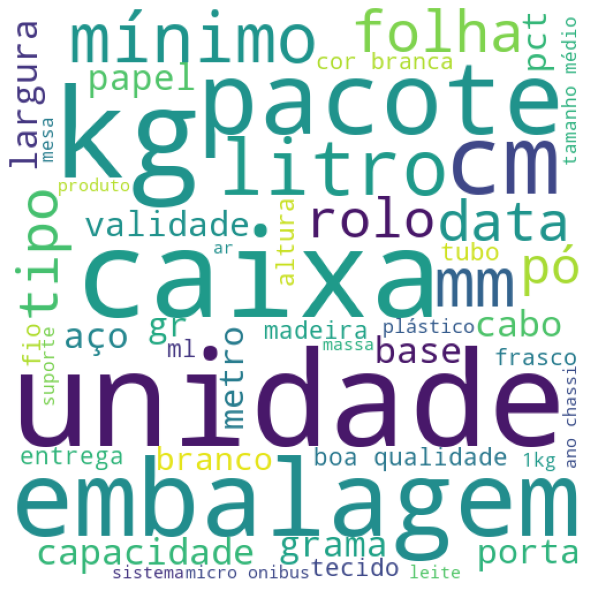

In [52]:
nuvem_palavras(item.DS_ITEM)

### Como pôde ser visto na nuvem, algumas palavras fazem sentido, mas existem outras que devem ser usadas como stop words e não devem ser levadas em consideração, como por exemplo, kg, gr, mm, largura, grama, etc. Portanto, irei testar outro caminho que seria através da frequência das palavras que mais aparecem.

In [53]:
item.DS_ITEM

0        Antiespumante para controle e minimização de e...
1        Aquisição de 40.000 kg (quarenta mil quilogram...
2        Ortopolifosfato líquido, concentração de 50 a ...
3        Aquisição de 65 t (sessenta e cindo toneladas)...
4        Bateria estacionária, para uso em nobreakes, 1...
                               ...                        
25186    Balão de latex nº 07 fabricado de borracha nat...
25187    Tinta tempera guache c/06 cores em potes plast...
25188    Refil cola quente grosso super transparente co...
25189    Alfinete de costura fabricado com arame de aço...
25190           Bloco de recibo simples bloco c/50 folhas.
Name: DS_ITEM, Length: 25122, dtype: object

# convertendo todas as palavras em minúsculas para que uma mesma palavra não seja contabilizada em 2 chaves de dicionário distintas

In [54]:
minusculas = item["DS_ITEM"].to_string().lower()

In [55]:
minusculas

'0        antiespumante para controle e minimização de e...\n1        aquisição de 40.000 kg (quarenta mil quilogram...\n2        ortopolifosfato líquido, concentração de 50 a ...\n3        aquisição de 65 t (sessenta e cindo toneladas)...\n4        bateria estacionária, para uso em nobreakes, 1...\n5        bateria estacionária, para uso em nobreakes, 6...\n6        bateria estacionária, para uso em nobreakes, 1...\n7        renovação do software para backup veritas exec...\n8        renovação do software para backup veritas exec...\n9        renovação do software para backup veritas exec...\n10       renovação do software para backup veritas exec...\n11       sophos central endpoint intercept x - subscrip...\n12       turbo misturador submersível em inox para lodo...\n13       hipoclorito de sódio, conforme termo de referê...\n14       sulfato de alumínio líquido isento de ferro, c...\n15       cloreto férrico (fecl3) - número onu 2582, a g...\n16       cód.  656 - ácido fluossilícic

# Splitando a string e armazenando em uma lista de palavras

In [56]:
lista = minusculas.split()

In [57]:
lista

['0',
 'antiespumante',
 'para',
 'controle',
 'e',
 'minimização',
 'de',
 'e...',
 '1',
 'aquisição',
 'de',
 '40.000',
 'kg',
 '(quarenta',
 'mil',
 'quilogram...',
 '2',
 'ortopolifosfato',
 'líquido,',
 'concentração',
 'de',
 '50',
 'a',
 '...',
 '3',
 'aquisição',
 'de',
 '65',
 't',
 '(sessenta',
 'e',
 'cindo',
 'toneladas)...',
 '4',
 'bateria',
 'estacionária,',
 'para',
 'uso',
 'em',
 'nobreakes,',
 '1...',
 '5',
 'bateria',
 'estacionária,',
 'para',
 'uso',
 'em',
 'nobreakes,',
 '6...',
 '6',
 'bateria',
 'estacionária,',
 'para',
 'uso',
 'em',
 'nobreakes,',
 '1...',
 '7',
 'renovação',
 'do',
 'software',
 'para',
 'backup',
 'veritas',
 'exec...',
 '8',
 'renovação',
 'do',
 'software',
 'para',
 'backup',
 'veritas',
 'exec...',
 '9',
 'renovação',
 'do',
 'software',
 'para',
 'backup',
 'veritas',
 'exec...',
 '10',
 'renovação',
 'do',
 'software',
 'para',
 'backup',
 'veritas',
 'exec...',
 '11',
 'sophos',
 'central',
 'endpoint',
 'intercept',
 'x',
 '-',
 '

# Os índices da coluna do dataframe também entraram na string e consequentemente na lista, então aqui vou removê-los

In [58]:
novos_items = [item for item in lista if not item.isdigit()]

In [59]:
novos_items

['antiespumante',
 'para',
 'controle',
 'e',
 'minimização',
 'de',
 'e...',
 'aquisição',
 'de',
 '40.000',
 'kg',
 '(quarenta',
 'mil',
 'quilogram...',
 'ortopolifosfato',
 'líquido,',
 'concentração',
 'de',
 'a',
 '...',
 'aquisição',
 'de',
 't',
 '(sessenta',
 'e',
 'cindo',
 'toneladas)...',
 'bateria',
 'estacionária,',
 'para',
 'uso',
 'em',
 'nobreakes,',
 '1...',
 'bateria',
 'estacionária,',
 'para',
 'uso',
 'em',
 'nobreakes,',
 '6...',
 'bateria',
 'estacionária,',
 'para',
 'uso',
 'em',
 'nobreakes,',
 '1...',
 'renovação',
 'do',
 'software',
 'para',
 'backup',
 'veritas',
 'exec...',
 'renovação',
 'do',
 'software',
 'para',
 'backup',
 'veritas',
 'exec...',
 'renovação',
 'do',
 'software',
 'para',
 'backup',
 'veritas',
 'exec...',
 'renovação',
 'do',
 'software',
 'para',
 'backup',
 'veritas',
 'exec...',
 'sophos',
 'central',
 'endpoint',
 'intercept',
 'x',
 '-',
 'subscrip...',
 'turbo',
 'misturador',
 'submersível',
 'em',
 'inox',
 'para',
 'lodo..

# Contando a frequência de cada palavra da lista e armazenando em um dicionário onde as chaves são as palavras e os valores são as frequências

In [60]:
import collections
contagens = dict(collections.Counter(novos_items))

In [61]:
contagens

{'antiespumante': 1,
 'para': 2406,
 'controle': 27,
 'e': 936,
 'minimização': 1,
 'de': 10044,
 'e...': 125,
 'aquisição': 244,
 '40.000': 1,
 'kg': 373,
 '(quarenta': 1,
 'mil': 7,
 'quilogram...': 1,
 'ortopolifosfato': 1,
 'líquido,': 14,
 'concentração': 3,
 'a': 489,
 '...': 1732,
 't': 18,
 '(sessenta': 1,
 'cindo': 1,
 'toneladas)...': 1,
 'bateria': 16,
 'estacionária,': 3,
 'uso': 101,
 'em': 1661,
 'nobreakes,': 3,
 '1...': 113,
 '6...': 8,
 'renovação': 6,
 'do': 275,
 'software': 10,
 'backup': 7,
 'veritas': 4,
 'exec...': 4,
 'sophos': 1,
 'central': 19,
 'endpoint': 1,
 'intercept': 1,
 'x': 1213,
 '-': 1453,
 'subscrip...': 1,
 'turbo': 6,
 'misturador': 1,
 'submersível': 1,
 'inox': 93,
 'lodo...': 1,
 'hipoclorito': 8,
 'sódio,': 11,
 'conforme': 95,
 'termo': 7,
 'referê...': 1,
 'sulfato': 31,
 'alumínio': 44,
 'líquido': 78,
 'isento': 17,
 'ferro,': 10,
 'c...': 201,
 'cloreto': 19,
 'férrico': 2,
 '(fecl3)': 1,
 'número': 45,
 'onu': 1,
 '2582,': 1,
 'g...': 3

# Ordenando o dicionário do maior para o menor para uma melhor visualização

In [79]:
contagens_ordenadas = dict(sorted(contagens.items(), key=lambda x: x[1], reverse=True))

In [80]:
contagens_ordenadas

{'de': 10044,
 'com': 3473,
 'para': 2406,
 '...': 1732,
 'em': 1661,
 '-': 1453,
 'x': 1213,
 'e': 936,
 'tipo': 830,
 'c/': 767,
 'embalagem': 653,
 'papel': 633,
 'cor': 533,
 'a': 489,
 'caixa': 463,
 'tamanho': 462,
 'pneu': 459,
 'sem': 451,
 'pacote': 413,
 'nº': 408,
 'mm': 406,
 'ml': 387,
 'kg': 373,
 'cm': 373,
 'fita': 367,
 'pvc': 336,
 'aço': 335,
 'tinta': 323,
 'tecido': 315,
 'pó': 313,
 'unidades': 309,
 'litros': 303,
 'cx': 297,
 'branco': 296,
 'material': 285,
 'cores': 277,
 'do': 275,
 'cola': 275,
 'p/': 272,
 'óleo': 270,
 'luva': 266,
 'tubo': 250,
 'qualidade,': 248,
 'pct': 247,
 'doce': 246,
 'aquisição': 244,
 'no': 241,
 'carne': 236,
 'cabo': 235,
 'medicamentos': 235,
 'saco': 234,
 'g': 230,
 'leite': 227,
 'grande': 223,
 'mg': 222,
 'branca': 221,
 'massa': 212,
 'ar': 209,
 'da': 208,
 '100%': 206,
 'farinha': 204,
 'c...': 201,
 'mínimo': 201,
 'boa': 201,
 'hp': 201,
 'milho': 198,
 'preto': 197,
 'm': 197,
 'fio': 196,
 'biscoito': 195,
 'rolo':

# Criando a lista de palavras que não deve ser contabilizada

In [81]:
# Lista de palavras que não serão contabilizadas
novas_stopwords = ["de", "da", "do", "para", "dos", "das", "cor", "...", "tamanho", "cores",
                     "em", "aquisição", "por", "preço", "registro", "mm", "cm", "branco",
                     "preços", "um", "através", "na", "no", "ou", "a", "kg", "ml", "cx", "litros",
                     "compra", "aquisicao", "uso", "com", "x", "e", "-", "¿", "qualidade,",
                      "nº","processo", "objeto", "p/", "c/", "100%", "tipo", "sem", "unidades"]

# Removendo as stop words do dicionário

In [82]:
for chave in novas_stopwords:
    contagens_ordenadas.pop(chave)

In [83]:
contagens_ordenadas

{'embalagem': 653,
 'papel': 633,
 'caixa': 463,
 'pneu': 459,
 'pacote': 413,
 'fita': 367,
 'pvc': 336,
 'aço': 335,
 'tinta': 323,
 'tecido': 315,
 'pó': 313,
 'material': 285,
 'cola': 275,
 'óleo': 270,
 'luva': 266,
 'tubo': 250,
 'pct': 247,
 'doce': 246,
 'carne': 236,
 'cabo': 235,
 'medicamentos': 235,
 'saco': 234,
 'g': 230,
 'leite': 227,
 'grande': 223,
 'mg': 222,
 'branca': 221,
 'massa': 212,
 'ar': 209,
 'farinha': 204,
 'c...': 201,
 'mínimo': 201,
 'boa': 201,
 'hp': 201,
 'milho': 198,
 'preto': 197,
 'm': 197,
 'fio': 196,
 'biscoito': 195,
 'rolo': 190,
 '(': 188,
 'folhas': 185,
 'pincel': 185,
 'verde': 182,
 'hospitalar': 181,
 'micro': 181,
 'pasta': 180,
 'água': 179,
 'filtro': 178,
 'gramas': 178,
 'caneta': 172,
 'plástico': 172,
 'folha': 170,
 'onibus': 169,
 'gr': 168,
 'agulha': 167,
 'novo': 165,
 'eva': 165,
 '1ª': 161,
 'lixo': 159,
 'un': 158,
 '+': 156,
 'mesa': 156,
 'pão': 155,
 'azul': 150,
 'descartável': 150,
 'capacidade': 148,
 'broca': 14

# Selecionando as 15 palavras com mais frequência para fazer um gráfico de barras

In [84]:
import itertools
itens_despesas = dict(itertools.islice(contagens_ordenadas.items(), 0, 15))

In [85]:
itens_despesas

{'embalagem': 653,
 'papel': 633,
 'caixa': 463,
 'pneu': 459,
 'pacote': 413,
 'fita': 367,
 'pvc': 336,
 'aço': 335,
 'tinta': 323,
 'tecido': 315,
 'pó': 313,
 'material': 285,
 'cola': 275,
 'óleo': 270,
 'luva': 266}

# Gráfico de barras com as palavras que aparecem com mais frequência na descrição dos itens, assim podemos saber os itens que estão relacionados com os maiores gastos

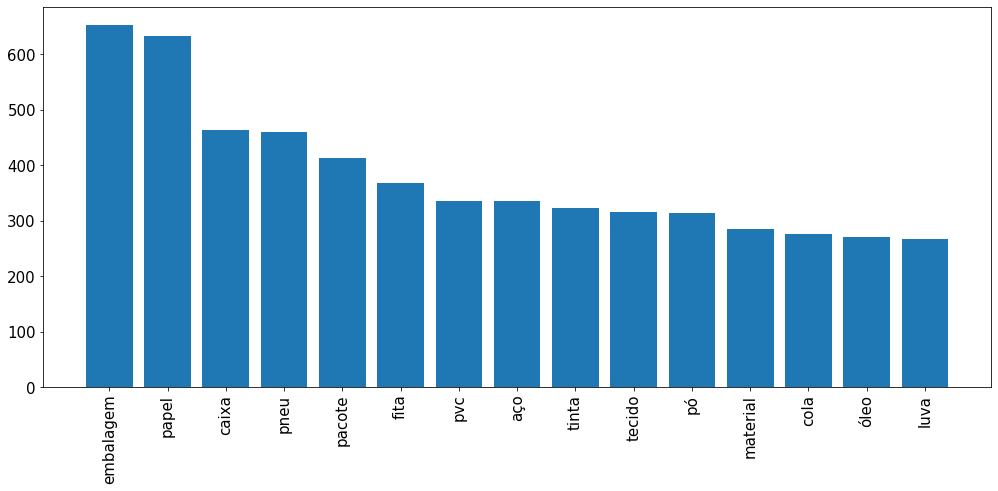

In [86]:
keys = itens_despesas.keys()
values = itens_despesas.values()
plt.rcParams.update({'font.size': 15})

plt.figure(figsize=(17,7))
plt.bar(keys, values)
plt.xticks(range(15), rotation='vertical')
plt.show()

# Usando a Lei de Benford para estudar as amostras do mesmo tipo, buscando encontrar dados inconsistêntes, errôneos ou até mesmo fraudes

In [87]:
import benford as bf

# Fazendo o estudo relacionado aos valores homologados dos itens

In [90]:
item_bf = pd.to_numeric(item.VL_TOTAL_HOMOLOGADO, errors='coerce')

### Aqui estou levando em consideração os primeiros 2 dígitos (10 - 99). Os dígitos em amarelo são os dígitos considerados inconsistentes, ou seja, esse dígitos acharam inconsistência nos dados


Initialized sequence with 24805 registries.
First_2_Dig
10    0.041322
11    0.036888
12    0.032816
13    0.032292
14    0.032090
15    0.029792
16    0.026003
17    0.024753
18    0.023705
19    0.026487
20    0.020036
21    0.019593
22    0.021165
23    0.018545
24    0.020117
25    0.018666
26    0.013908
27    0.015279
28    0.014916
29    0.014876
30    0.015844
31    0.011732
32    0.012296
33    0.011288
34    0.013626
35    0.013062
36    0.011651
37    0.011691
38    0.010845
39    0.013586
40    0.010401
41    0.009313
42    0.010643
43    0.009192
44    0.011207
45    0.009998
46    0.008063
47    0.009313
48    0.009434
49    0.010603
50    0.010603
51    0.007740
52    0.008264
53    0.006249
54    0.008345
55    0.007539
56    0.006047
57    0.007095
58    0.006007
59    0.008748
60    0.010482
61    0.004435
62    0.005160
63    0.005805
64    0.006934
65    0.006249
66    0.005523
67    0.006249
68    0.005362
69    0.006087
70    0.007418
71    0.005241
72    0.00641

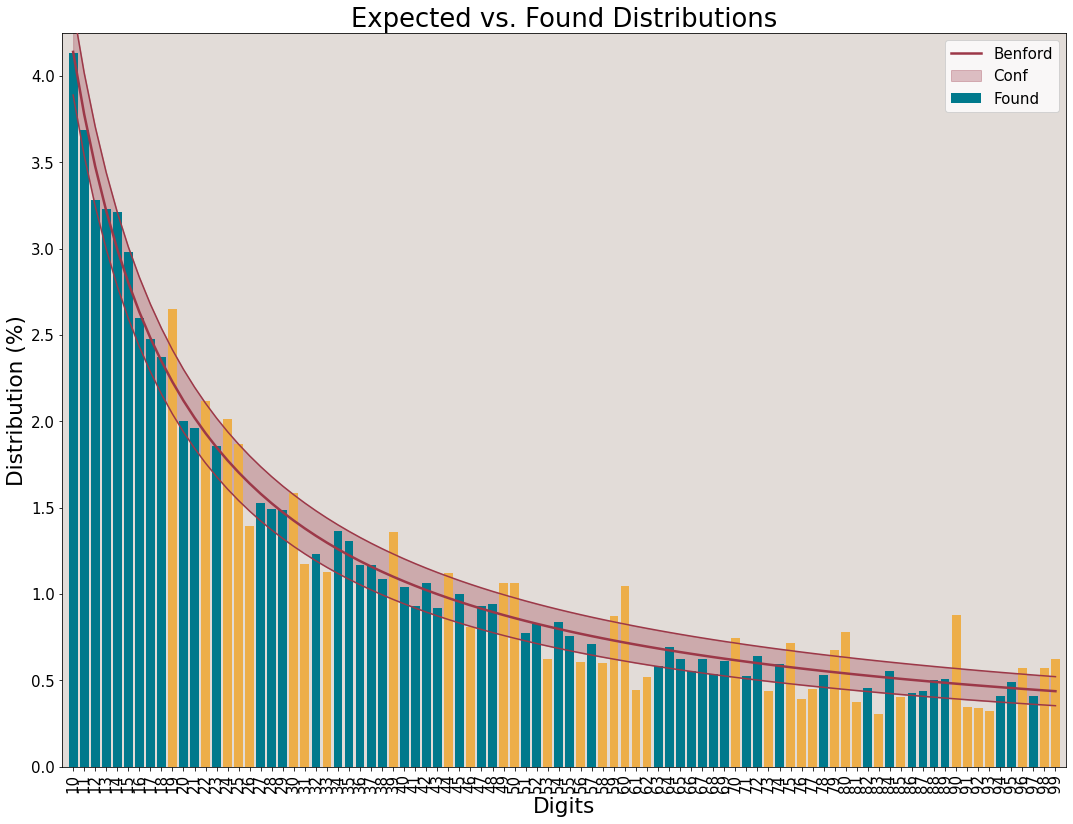

In [91]:
f2d = bf.first_digits(item_bf, digs=2, decimals=8, confidence=95)

# Cruzando os dígitos com o dataframe

### Copiando o dataframe para alterar o novo, selecionando apenas os 3 primeiro dígitos com mais inconsistência (90, 60 e 80)

In [92]:
itens_digitos = item

# Convertendo a coluna de float para string

In [93]:
itens_digitos['VL_TOTAL_HOMOLOGADO'] = itens_digitos['VL_TOTAL_HOMOLOGADO'].astype(str)

# Selecionando as linhas cujos valores de VL_TOTAL_HOMOLOGADO começam com 90, 60 e 80

In [94]:
dados_incosistentes = pd.DataFrame(itens_digitos.loc[itens_digitos['VL_TOTAL_HOMOLOGADO'].str.startswith(('90', '60', '80'))])

In [95]:
dados_incosistentes

,CD_ORGAO,NM_ORGAO,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,NR_PROCESSO,ANO_PROCESSO,TP_OBJETO,CD_TIPO_FASE_ATUAL,TP_LICITACAO,...,TP_RESULTADO_PROPOSTA,NR_LOTE,NR_ITEM,NR_ITEM_ORIGINAL,DS_ITEM,QT_ITENS,SG_UNIDADE_MEDIDA,VL_UNITARIO_HOMOLOGADO,VL_TOTAL_HOMOLOGADO,TP_DOCUMENTO
17,45003,SERVIÇO AUTÔN. MUN. DE ÁGUA E ESGOTO - CX.SUL,15.0,2018,PRP,2682,2018,COM,ADH,MPR,...,C,1,1,1,Aquisição de 1.800 t (mil e oitocentas tonelad...,1800.00,T,449.4000,808920.00,J
76,88261,FUND. DE SAÚDE PÚBLICA DE NOVO HAMBURGO,12.0,2018,PRP,174,2018,COM,ADH,MPR,...,C,3,2,2,Dentro da cidade de Novo Hamburgo (ida e volta),5.00,UN,1200.0000,6000.00,J
93,88261,FUND. DE SAÚDE PÚBLICA DE NOVO HAMBURGO,12.0,2018,PRP,174,2018,COM,ADH,MPR,...,C,1,8,8,Novo Hamburgo para os municípios região Serran...,1.00,UN,900.0000,900.00,J
154,50000,PM DE IGREJINHA,23.0,2018,TMP,23,2018,COM,ADH,MPR,...,C,1,8,8,"Troféu com 90 cm de altura, com base redonda c...",8.00,UN,760.0000,6080.00,J
199,68500,PM DE ITACURUBI,39.0,2018,PRP,116,2018,COM,ADH,MPR,...,C,1,3,3,Lancetas para teste HGT,1000.00,UN,0.0600,60.00,J
204,62600,PM DE VENÂNCIO AIRES,21.0,2018,TMP,3520,2018,COM,ADH,MPR,...,C,1,1,1,Instalação de esquadrias de alumínio para fech...,1.00,UN,60544.5600,60544.56,J
220,73400,PM DE ALTO FELIZ,16.0,2018,CNV,986,2018,COM,ADH,MPR,...,C,1,10,10,Dosagem de Bilirrubina Total e Frações,50.00,UN,1.8000,90.00,J
222,73400,PM DE ALTO FELIZ,16.0,2018,CNV,986,2018,COM,ADH,MPR,...,C,1,12,12,Dosagem de colesterol HDL,200.00,UN,3.0000,600.00,J
225,73400,PM DE ALTO FELIZ,16.0,2018,CNV,986,2018,COM,ADH,MPR,...,C,1,15,15,Dosagem de Cortisol,10.00,UN,9.0000,90.00,J
239,73400,PM DE ALTO FELIZ,16.0,2018,CNV,986,2018,COM,ADH,MPR,...,C,1,29,29,Dosagem de Potássio,50.00,UN,1.6000,80.00,J


# Checando quais orgão tiveram mais dados inconsistentes referentes à coluna VL_TOTAL_HOMOLOGADO

In [96]:
dados_incosistentes['NM_ORGAO'].value_counts()

PM DE FREDERICO WESTPHALEN                                  56
PM DE ARROIO DO TIGRE                                       46
PM DE RIO GRANDE                                            46
PM DE SÃO VICENTE DO SUL                                    37
PM DE SALTO DO JACUÍ                                        37
PM DE ALPESTRE                                              26
PM DE ERNESTINA                                             25
PM DE RODEIO BONITO                                         22
PM DE MORRO REUTER                                          20
PM DE PINHAL                                                19
PM DE SEBERI                                                19
PM DE ESPUMOSO                                              19
PM DE IBIRUBÁ                                               18
PM DE VISTA GAÚCHA                                          18
PM DE CAMPOS BORGES                                         17
PM DE IRAÍ                                             

# Fazendo o estudo relacionado aos valores totais das propostas

In [97]:
total_proposta_bf = item.VL_TOTAL_PROPOSTA


Initialized sequence with 25122 registries.
First_2_Dig
10    0.042513
11    0.030650
12    0.039846
13    0.042473
14    0.039129
15    0.034949
16    0.037378
17    0.020739
18    0.023048
19    0.024321
20    0.024003
21    0.015962
22    0.020580
23    0.016002
24    0.019664
25    0.015803
26    0.015007
27    0.015086
28    0.015683
29    0.013216
30    0.009315
31    0.006886
32    0.011982
33    0.019664
34    0.011783
35    0.010986
36    0.014688
37    0.013892
38    0.010549
39    0.007324
40    0.012499
41    0.012141
42    0.005971
43    0.008956
44    0.012897
45    0.008160
46    0.007882
47    0.008041
48    0.007125
49    0.008081
50    0.006289
51    0.005931
52    0.007921
53    0.010827
54    0.006648
55    0.009514
56    0.003503
57    0.007842
58    0.003622
59    0.006050
60    0.010708
61    0.012141
62    0.010986
63    0.002985
64    0.003821
65    0.006648
66    0.017793
67    0.006926
68    0.008797
69    0.004816
70    0.005215
71    0.004379
72    0.00250

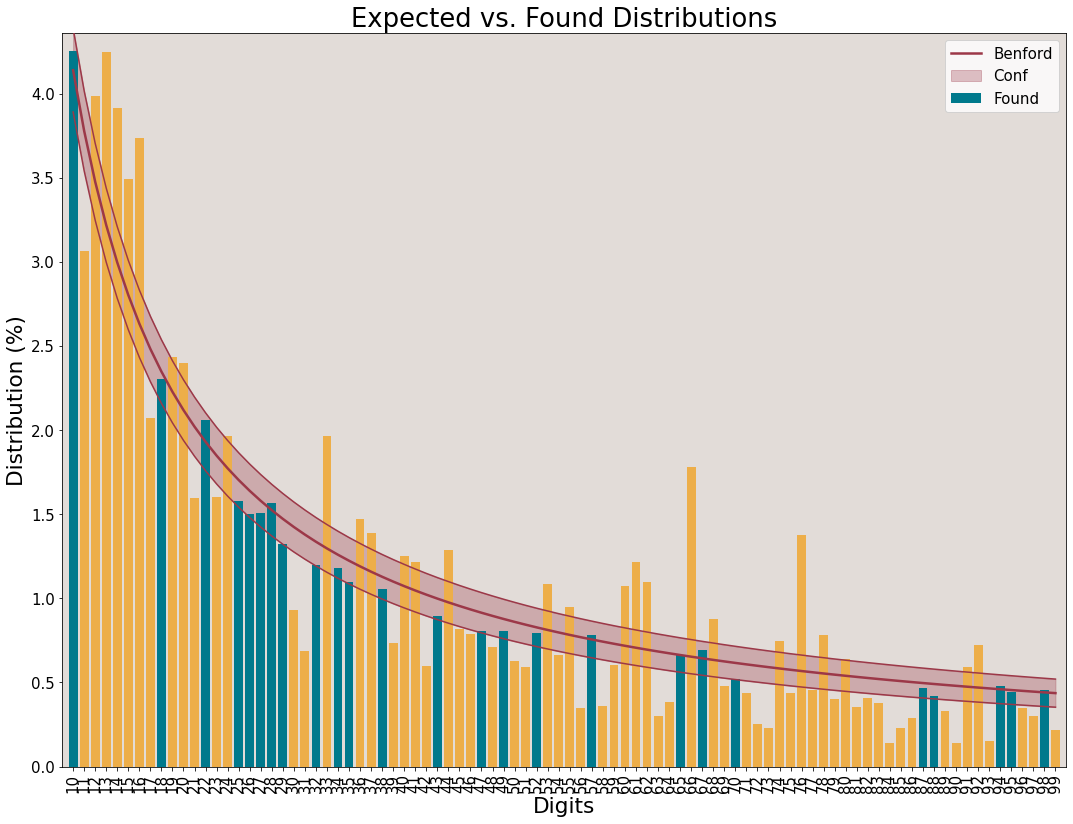

In [98]:
f2d = bf.first_digits(total_proposta_bf, digs=2, decimals=8, confidence=95)

# Cruzando os dígitos com o dataframe

### Copiando o dataframe para alterar o novo, selecionando apenas os 3 primeiro dígitos com mais inconsistência (66, 76 e 16)

In [99]:
itens_digitos = item

# Convertendo a coluna de float para string

In [100]:
itens_digitos['VL_TOTAL_PROPOSTA'] = itens_digitos['VL_TOTAL_PROPOSTA'].astype(str)

# Selecionando as linhas cujos valores de VL_TOTAL_HOMOLOGADO começam com 66, 76 e 16

In [101]:
dados_incosistentes = pd.DataFrame(itens_digitos.loc[itens_digitos['VL_TOTAL_PROPOSTA'].str.startswith(('66', '76', '16'))])

In [102]:
dados_incosistentes

,CD_ORGAO,NM_ORGAO,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,NR_PROCESSO,ANO_PROCESSO,TP_OBJETO,CD_TIPO_FASE_ATUAL,TP_LICITACAO,...,TP_RESULTADO_PROPOSTA,NR_LOTE,NR_ITEM,NR_ITEM_ORIGINAL,DS_ITEM,QT_ITENS,SG_UNIDADE_MEDIDA,VL_UNITARIO_HOMOLOGADO,VL_TOTAL_HOMOLOGADO,TP_DOCUMENTO
14,45003,SERVIÇO AUTÔN. MUN. DE ÁGUA E ESGOTO - CX.SUL,83.0,2018,PRP,19449,2018,COM,ADH,MPR,...,C,1,1,1,"Sulfato de alumínio líquido isento de ferro, c...",336.00,T,489.580,164498.88,J
15,45003,SERVIÇO AUTÔN. MUN. DE ÁGUA E ESGOTO - CX.SUL,71.0,2018,PRP,13535,2018,COM,ADH,MPR,...,C,1,1,1,"Cloreto Férrico (FeCl3) - Número ONU 2582, a g...",13000.00,KG,1.246,16198.00,J
131,54912,CIA. CARRIS PORTO-ALEGRENSE,152.0,2018,PRE,PE152,2018,COM,ADH,MPR,...,C,1,1,40025,Lista de peças Mann.,1.00,ANO,160000.000,160000.00,J
369,48800,PM DE GETÚLIO VARGAS,17.0,2018,PRP,163,2018,COM,ADH,MPR,...,C,1,1,1,TINTA AUTOMOTIVA PRETO,10.00,UN,29.000,290.00,J
370,48800,PM DE GETÚLIO VARGAS,17.0,2018,PRP,163,2018,COM,ADH,MPR,...,C,1,4,4,PARALAMA FERRO DA CAÇAMBA,2.00,UN,296.000,592.00,J
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24969,41200,PM DE ARROIO DO TIGRE,2.0,2018,PRP,5,2018,COM,ADH,MPR,...,C,1,4,4,OLEO DIESEL COMUM SMOV,80000.00,LT,3.150,252000.00,J
24970,41200,PM DE ARROIO DO TIGRE,2.0,2018,PRP,5,2018,COM,ADH,MPR,...,C,1,7,7,OLEO DIESEL COMUM SMEC,75000.00,LT,3.150,236250.00,J
24971,41200,PM DE ARROIO DO TIGRE,2.0,2018,PRP,5,2018,COM,ADH,MPR,...,C,1,10,10,OLEO DIESEL COMUM SMAGRIC,50000.00,LT,3.150,157500.00,J
24972,41200,PM DE ARROIO DO TIGRE,2.0,2018,PRP,5,2018,COM,ADH,MPR,...,C,1,15,15,"OLEO LUBRIFICANTE, ATFTA TIPO A VERMELHO, 1° L...",2.00,TB,2115.000,4230.00,J


# Checando quais orgão tiveram mais dados inconsistentes referentes à coluna VL_TOTAL_PROPOSTA

In [103]:
dados_incosistentes['NM_ORGAO'].value_counts()

PM DE FREDERICO WESTPHALEN                                               230
PM DE MORRO REUTER                                                       211
PM DE ARROIO DO TIGRE                                                    209
PM DE ALPESTRE                                                           191
PM DE SÃO VICENTE DO SUL                                                 176
PM DE IBIRUBÁ                                                             90
PM DE RODEIO BONITO                                                       89
PM DE FORTALEZA DOS VALOS                                                 75
PM DE CAMPOS BORGES                                                       57
PM DE IRAÍ                                                                56
PM DE ERNESTINA                                                           52
PM DE SAGRADA FAMÍLIA                                                     41
PM DE CASCA                                                               36

# Fazendo o estudo relacionado aos valores de licitação

In [104]:
vl_licitacao_bf = item.VL_LICITACAO


Initialized sequence with 20315 registries.
First_2_Dig
10    0.041644
11    0.046911
12    0.036525
13    0.056461
14    0.017179
15    0.023529
16    0.021167
17    0.014718
18    0.021019
19    0.019690
20    0.007876
21    0.027861
22    0.020379
23    0.008024
24    0.022742
25    0.024120
26    0.020921
27    0.011912
28    0.023086
29    0.007384
30    0.018853
31    0.020674
32    0.018213
33    0.021856
34    0.002609
35    0.003298
36    0.015998
37    0.020281
38    0.024465
39    0.005513
40    0.004529
41    0.013045
42    0.003643
43    0.004578
44    0.012798
45    0.014571
46    0.009550
47    0.009943
48    0.004086
49    0.004086
50    0.010928
51    0.015358
52    0.000886
53    0.001477
54    0.003938
55    0.013537
56    0.003643
57    0.002658
58    0.001378
59    0.022397
60    0.007236
61    0.000788
62    0.006301
63    0.007876
64    0.009353
65    0.004726
66    0.005513
67    0.013045
68    0.015161
69    0.001674
70    0.003938
71    0.004873
72    0.00113

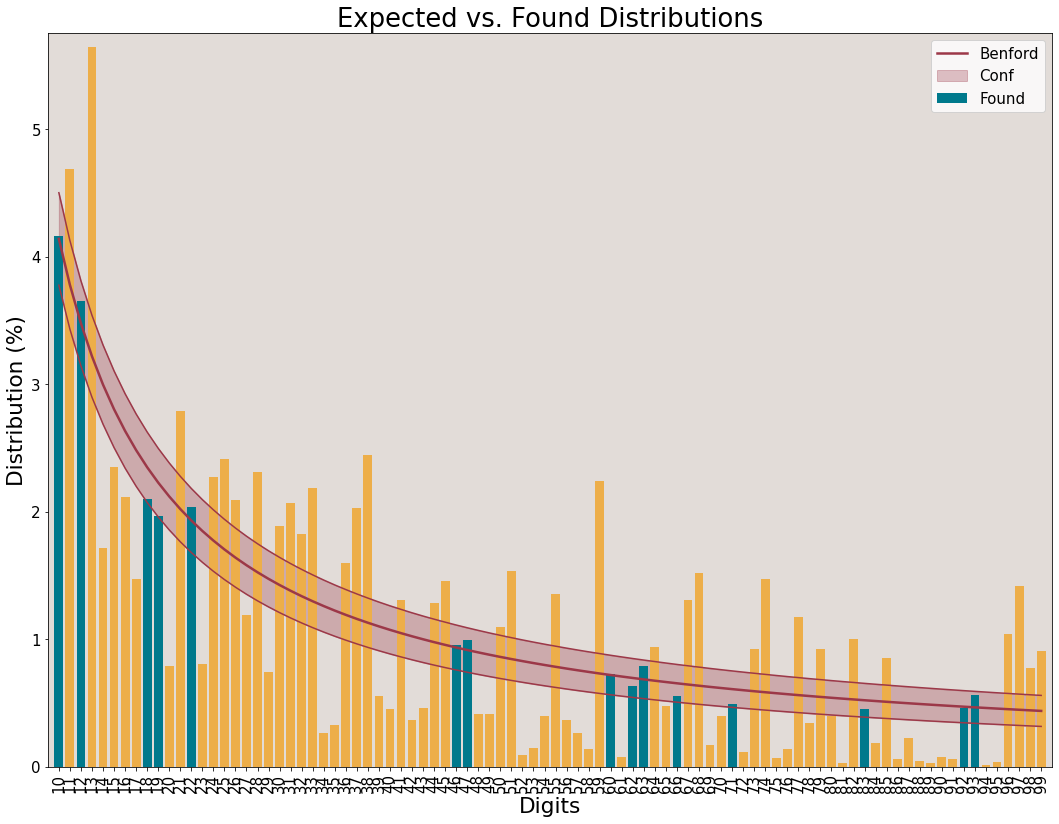

In [105]:
f2d = bf.first_digits(vl_licitacao_bf, digs=2, decimals=8, confidence=99)

# Cruzando os dígitos com o dataframe

### Copiando o dataframe para alterar o novo, selecionando apenas os 3 primeiro dígitos com mais inconsistência (59, 97 e 13)

In [106]:
itens_digitos = item

# Convertendo a coluna de float para string

In [107]:
itens_digitos['VL_LICITACAO'] = itens_digitos['VL_LICITACAO'].astype(str)

# Selecionando as linhas cujos valores de VL_TOTAL_HOMOLOGADO começam com 59, 97 e 13

In [108]:
dados_incosistentes = pd.DataFrame(itens_digitos.loc[itens_digitos['VL_LICITACAO'].str.startswith(('59', '97', '13'))])

In [109]:
dados_incosistentes

,CD_ORGAO,NM_ORGAO,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,NR_PROCESSO,ANO_PROCESSO,TP_OBJETO,CD_TIPO_FASE_ATUAL,TP_LICITACAO,...,TP_RESULTADO_PROPOSTA,NR_LOTE,NR_ITEM,NR_ITEM_ORIGINAL,DS_ITEM,QT_ITENS,SG_UNIDADE_MEDIDA,VL_UNITARIO_HOMOLOGADO,VL_TOTAL_HOMOLOGADO,TP_DOCUMENTO
17,45003,SERVIÇO AUTÔN. MUN. DE ÁGUA E ESGOTO - CX.SUL,15.0,2018,PRP,2682,2018,COM,ADH,MPR,...,C,1,1,1,Aquisição de 1.800 t (mil e oitocentas tonelad...,1800.00,T,449.4,808920.00,J
144,50000,PM DE IGREJINHA,23.0,2018,TMP,23,2018,COM,ADH,MPR,...,C,1,10,10,"Troféu com 30 cm de altura, com base oval co...",12.00,UN,73.0,876.00,J
145,50000,PM DE IGREJINHA,23.0,2018,TMP,23,2018,COM,ADH,MPR,...,C,1,2,2,Troféu especial personalizado 80cm de altura -...,8.00,UN,441.0,3528.00,J
146,50000,PM DE IGREJINHA,23.0,2018,TMP,23,2018,COM,ADH,MPR,...,C,1,19,19,"Troféu com 30cm de altura, base em MDF 1° e a ...",40.00,UN,54.7,2188.00,J
147,50000,PM DE IGREJINHA,23.0,2018,TMP,23,2018,COM,ADH,MPR,...,C,1,14,14,"Troféu com 34cm de altura, em fundição com for...",68.00,UN,97.1,6602.80,J
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24992,48400,PM DE FREDERICO WESTPHALEN,11.0,2018,PRP,17,2018,COM,ADH,MPR,...,C,1,7,7,Colchonetes médios oxer oxr d 70.,5.00,UN,57.5,287.50,J
24993,48400,PM DE FREDERICO WESTPHALEN,11.0,2018,PRP,17,2018,COM,ADH,MPR,...,C,1,6,6,Cones tamanho pequeno em plástico polipropileno.,30.00,UN,35.0,1050.00,J
24994,48400,PM DE FREDERICO WESTPHALEN,11.0,2018,PRP,17,2018,COM,ADH,MPR,...,C,1,4,4,"Bolas de borracha iniciação Nº- 12, matrizada,...",39.00,UN,35.3,1376.70,J
24995,48400,PM DE FREDERICO WESTPHALEN,11.0,2018,PRP,17,2018,COM,ADH,MPR,...,C,1,3,3,"Bolas de Voleibol Mg 4.500 sem costura, PVC ci...",38.00,UN,42.5,1615.00,J


# Checando quais orgão tiveram mais dados inconsistentes referentes à coluna VL_LICITACAO

In [110]:
dados_incosistentes['NM_ORGAO'].value_counts()

PM DE ALPESTRE                                   345
PM DE FREDERICO WESTPHALEN                       261
PM DE SÃO VICENTE DO SUL                         179
PM DE ESPUMOSO                                   155
PM DE VISTA GAÚCHA                               118
PM DE MORMAÇO                                    106
PM DE AUGUSTO PESTANA                             85
PM DE CAMPOS BORGES                               81
PM DE IBIRUBÁ                                     81
PM DE PLANALTO                                    74
PM DE RODEIO BONITO                               67
PM DE ALTO ALEGRE                                 61
PM DE SEBERI                                      46
PM DE CANGUÇU                                     32
PM DE SALTO DO JACUÍ                              25
PM DE ANTA GORDA                                  22
PM DE IGREJINHA                                   22
PM DE GUAPORÉ                                     20
PM DE NOVA RAMADA                             